In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.0001
epochs = 10
batch_size = 64

class MyModel(nn.Module):
    def __init__(self, initialization='random_normal'):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 32, bias=True)
        self.fc2 = nn.Linear(32, 32, bias=True)
        self.fc3 = nn.Linear(32, 16, bias=True)
        self.fc4 = nn.Linear(16, 16, bias=True)
        self.fc5 = nn.Linear(16, 16, bias=True)
        self.fc6 = nn.Linear(16, 16, bias=True)
        self.fc7 = nn.Linear(16, 10, bias=True)
        self.relu = nn.ReLU()

        if initialization == 'random_normal':
            self.initialize_weights_random_normal()
        elif initialization == 'he':
            self.initialize_weights_he()

    def initialize_weights_random_normal(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                m.weight.data.normal_(0.0, 0.01)
                m.bias.data.fill_(0)

    def initialize_weights_he(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                m.bias.data.fill_(0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        return x


def train_digits(initialization):
    # Load MNIST dataset
    mnist_train = datasets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
    mnist_test = datasets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

    # Create the model with the specified initialization
    model = MyModel(initialization).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Create a data loader
    mnist_data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

    # Lists to store loss and accuracy for plotting
    accuracies = []

    # Training loop
    for epoch in range(epochs):
        average_cost = 0
        total_correct = 0
        total_samples = 0

        for X, Y in mnist_data_loader:
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            hypothesis = model(X)
            cost = criterion(hypothesis, Y)
            cost.backward()
            optimizer.step()

            average_cost += cost.item() / len(mnist_data_loader)

            _, predicted = torch.max(hypothesis.data, 1)
            total_samples += Y.size(0)
            total_correct += (predicted == Y).sum().item()

        accuracy = 100 * total_correct / total_samples
        accuracies.append(accuracy)

    return accuracies  # Return the list of accuracies

# List of initializations to test
initializations = ['random_normal', 'he']
results = []

# Train and collect accuracies for different initializations
for initialization in initializations:
    accuracies = train_digits(initialization)
    results.append((initialization, accuracies))

# Plot accuracy for different initializations
plt.figure(figsize=(10, 6))
for initialization, accuracies in results:
    plt.plot(range(1, epochs + 1), accuracies, label=f'Initialization={initialization}')

plt.title('Accuracy Over Epochs for Different Initializations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: ignored

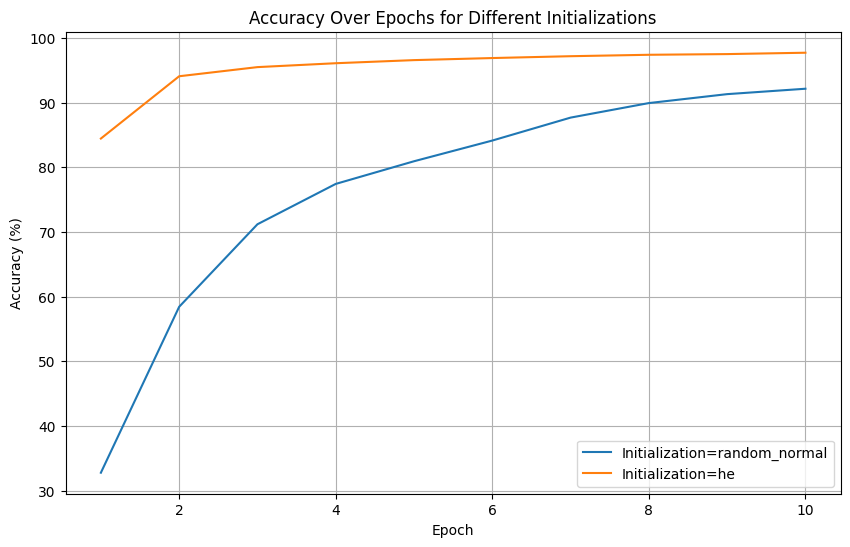

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if GPU is available

# Hyperparameters
learning_rate = 0.001  # Increase the learning rate
epochs = 10
batch_size = 64

# Define the model outside of the train_digits function
class MyModel(nn.Module):
    def __init__(self, initialization='random_normal'):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 32, bias=True)
        self.fc2 = nn.Linear(32, 32, bias=True)
        self.fc3 = nn.Linear(32, 16, bias=True)
        self.fc4 = nn.Linear(16, 16, bias=True)
        self.fc5 = nn.Linear(16, 16, bias=True)
        self.fc6 = nn.Linear(16, 16, bias=True)
        self.fc7 = nn.Linear(16, 10, bias=True)
        self.relu = nn.ReLU()

        if initialization == 'random_normal':
            self.initialize_weights_random_normal()
        elif initialization == 'he':
            self.initialize_weights_he()

    def initialize_weights_random_normal(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                m.weight.data.normal_(0.0, 0.01)
                m.bias.data.fill_(0)

    def initialize_weights_he(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                m.bias.data.fill_(0)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        return x

# Define a function to train the model with a given initialization
def train_digits(initialization):
    # Load MNIST dataset
    mnist_train = datasets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
    mnist_test = datasets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

    # Create the model with the specified initialization
    model = MyModel(initialization).to(device)

    # Define the loss function (criterion) and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Create a data loader
    mnist_data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

    # Lists to store loss and accuracy for plotting
    accuracies = []

    # Training loop
    for epoch in range(epochs):
        average_cost = 0
        total_correct = 0
        total_samples = 0

        for X, Y in mnist_data_loader:
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            hypothesis = model(X)
            cost = criterion(hypothesis, Y)
            cost.backward()
            optimizer.step()

            average_cost += cost.item() / len(mnist_data_loader)

            _, predicted = torch.max(hypothesis.data, 1)
            total_samples += Y.size(0)
            total_correct += (predicted == Y).sum().item()

        accuracy = 100 * total_correct / total_samples
        accuracies.append(accuracy)

    return accuracies  # Return the list of accuracies

# List of initializations to test
initializations = ['random_normal', 'he']
results = []

# Train and collect accuracies for different initializations
for initialization in initializations:
    accuracies = train_digits(initialization)
    results.append((initialization, accuracies))

# Plot accuracy for different initializations
plt.figure(figsize=(10, 6))
for initialization, accuracies in results:
    plt.plot(range(1, epochs + 1), accuracies, label=f'Initialization={initialization}')

plt.title('Accuracy Over Epochs for Different Initializations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


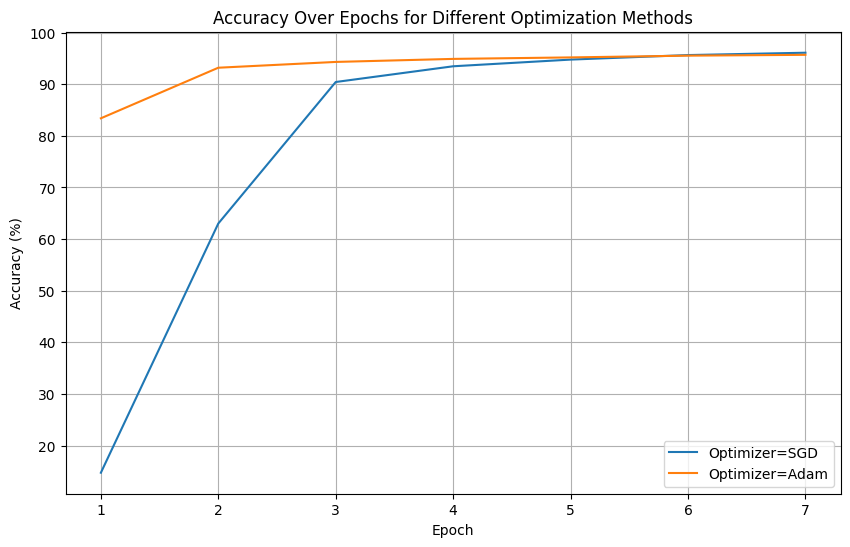

In [31]:
#3
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
learning_rate = 0.01  # Increase the learning rate
momentum = 0.9  # Add momentum
epochs = 7
batch_size = 64

# Define the model outside of the train_digits function
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 32, bias=True)
        self.fc2 = nn.Linear(32, 32, bias=True)
        self.fc3 = nn.Linear(32, 16, bias=True)
        self.fc4 = nn.Linear(16, 16, bias=True)
        self.fc5 = nn.Linear(16, 16, bias=True)
        self.fc6 = nn.Linear(16, 16, bias=True)
        self.fc7 = nn.Linear(16, 10, bias=True)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        return x

# Define a function to train the model with a given optimizer
def train_digits(optimizer_name):
    # Load MNIST dataset
    mnist_train = datasets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
    mnist_test = datasets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

    # Create the model
    model = MyModel().to(device)

    # Define the loss function (criterion)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # Add other optimizers as needed

    # Create a data loader
    mnist_data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

    #
    accuracies = []

    # Training loop
    for epoch in range(epochs):
        average_cost = 0
        total_correct = 0
        total_samples = 0

        for X, Y in mnist_data_loader:
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            hypothesis = model(X)
            cost = criterion(hypothesis, Y)
            cost.backward()
            optimizer.step()

            average_cost += cost.item() / len(mnist_data_loader)

            _, predicted = torch.max(hypothesis.data, 1)
            total_samples += Y.size(0)
            total_correct += (predicted == Y).sum().item()

        accuracy = 100 * total_correct / total_samples
        accuracies.append(accuracy)

    return accuracies  # Return the list of accuracies

# List of optimizers to test
optimizers = ['SGD', 'Adam']
results = []

# Train and collect accuracies for different optimizers
for optimizer_name in optimizers:
    accuracies = train_digits(optimizer_name)
    results.append((optimizer_name, accuracies))

# Plot accuracy for different optimizers
plt.figure(figsize=(10, 6))
for optimizer_name, accuracies in results:
    plt.plot(range(1, epochs + 1), accuracies, label=f'Optimizer={optimizer_name}')

plt.title('Accuracy Over Epochs for Different Optimization Methods')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


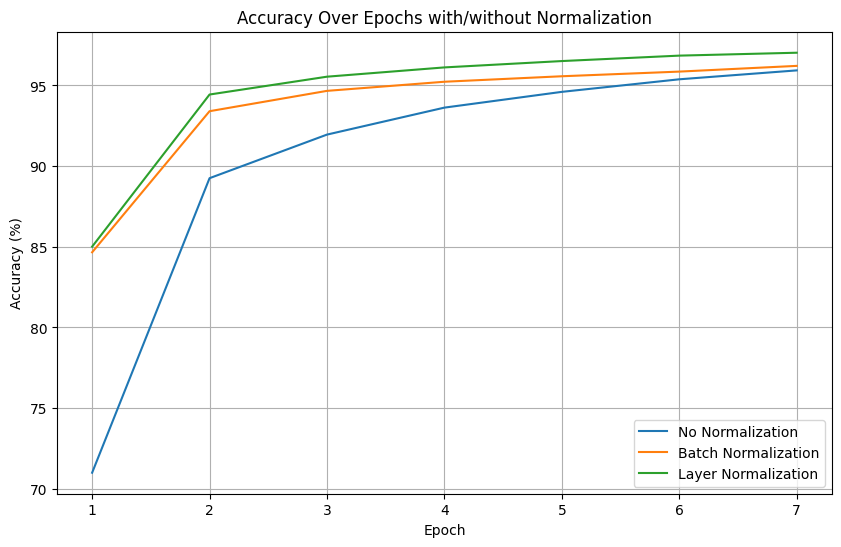

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
learning_rate = 0.001
epochs = 7
batch_size = 64

# Define the model outside of the train_digits function
class MyModel(nn.Module):
    def __init__(self, use_batch_norm=False, use_layer_norm=False):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 32, bias=True)
        self.fc2 = nn.Linear(32, 32, bias=True)
        self.fc3 = nn.Linear(32, 16, bias=True)
        self.fc4 = nn.Linear(16, 16, bias=True)
        self.fc5 = nn.Linear(16, 16, bias=True)
        self.fc6 = nn.Linear(16, 16, bias=True)
        self.fc7 = nn.Linear(16, 10, bias=True)
        self.relu = nn.ReLU()

        # Add batch normalization or layer normalization
        if use_batch_norm:
            self.bn1 = nn.BatchNorm1d(32)
            self.bn2 = nn.BatchNorm1d(32)
            self.bn3 = nn.BatchNorm1d(16)
            self.bn4 = nn.BatchNorm1d(16)
            self.bn5 = nn.BatchNorm1d(16)
            self.bn6 = nn.BatchNorm1d(16)
        if use_layer_norm:
            self.ln1 = nn.LayerNorm(32)
            self.ln2 = nn.LayerNorm(32)
            self.ln3 = nn.LayerNorm(16)
            self.ln4 = nn.LayerNorm(16)
            self.ln5 = nn.LayerNorm(16)
            self.ln6 = nn.LayerNorm(16)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        if hasattr(self, 'bn1'):
            x = self.bn1(x)
        if hasattr(self, 'ln1'):
            x = self.ln1(x)

        x = self.fc2(x)
        x = self.relu(x)
        if hasattr(self, 'bn2'):
            x = self.bn2(x)
        if hasattr(self, 'ln2'):
            x = self.ln2(x)

        x = self.fc3(x)
        x = self.relu(x)
        if hasattr(self, 'bn3'):
            x = self.bn3(x)
        if hasattr(self, 'ln3'):
            x = self.ln3(x)

        x = self.fc4(x)
        x = self.relu(x)
        if hasattr(self, 'bn4'):
            x = self.bn4(x)
        if hasattr(self, 'ln4'):
            x = self.ln4(x)

        x = self.fc5(x)
        x = self.relu(x)
        if hasattr(self, 'bn5'):
            x = self.bn5(x)
        if hasattr(self, 'ln5'):
            x = self.ln5(x)

        x = self.fc6(x)
        x = self.relu(x)
        if hasattr(self, 'bn6'):
            x = self.bn6(x)
        if hasattr(self, 'ln6'):
            x = self.ln6(x)

        x = self.fc7(x)
        return x

# Define a function to train the model with or without normalization
def train_digits(use_batch_norm, use_layer_norm):
    # Load MNIST dataset
    mnist_train = datasets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
    mnist_test = datasets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

    # Create the model with or without normalization
    model = MyModel(use_batch_norm=use_batch_norm, use_layer_norm=use_layer_norm).to(device)

    # Define the loss function (criterion) and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Create a data loader
    mnist_data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

    # Lists to store loss and accuracy for plotting
    accuracies = []

    # Training loop
    for epoch in range(epochs):
        average_cost = 0
        total_correct = 0
        total_samples = 0

        for X, Y in mnist_data_loader:
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)
            optimizer.zero_grad()
            hypothesis = model(X)
            cost = criterion(hypothesis, Y)
            cost.backward()
            optimizer.step()

            average_cost += cost.item() / len(mnist_data_loader)

            _, predicted = torch.max(hypothesis.data, 1)
            total_samples += Y.size(0)
            total_correct += (predicted == Y).sum().item()

        accuracy = 100 * total_correct / total_samples
        accuracies.append(accuracy)

    return accuracies  # Return the list of accuracies

# Train and collect accuracies for different configurations
no_norm_accuracies = train_digits(use_batch_norm=False, use_layer_norm=False)
batch_norm_accuracies = train_digits(use_batch_norm=True, use_layer_norm=False)
layer_norm_accuracies = train_digits(use_batch_norm=False, use_layer_norm=True)

# Plot accuracy for different configurations
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), no_norm_accuracies, label='No Normalization')
plt.plot(range(1, epochs + 1), batch_norm_accuracies, label='Batch Normalization')
plt.plot(range(1, epochs + 1), layer_norm_accuracies, label='Layer Normalization')

plt.title('Accuracy Over Epochs with/without Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()
